# Jupyter Notebook Cybersecurity Hunting - Web Proxy Logs 

This Jupyter Notebook uses sample web proxy logs as the data source to perform quick threat hunting, analytics and reporting. 

The data set used in this Jupyter Notebook is from: http://log-sharing.dreamhosters.com/bluecoat_proxy_big.zip. 

### Import Libraries

In [5]:
import pandas as pd
# data analysis and manipulation tool

import os
# operating system interface

import whois
#https://anaconda.org/rapidsai/python-whois

import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
#https://anaconda.org/conda-forge/pandas-profiling

In [6]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

import pandas as pd
from pandas_profiling import ProfileReport

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [7]:
import numpy as np
# mathematical functions

import matplotlib.pyplot as plt
# creating static, animated, and interactive visualizations

%matplotlib inline
# renders static images 

# %matplotlib notebook
# renders dynamic interactive images 

#### Identify Your Notebook's System Location

In [3]:
os.getcwd()
# print current working directory

'C:\\Users\\IEUser\\Documents\\Jupyter'

#### Determine the Size of Proxy Log File

In [6]:
file_size = os.path.getsize('C:\\Users\\IEUser\\Documents\\Jupyter\\Demo_log_004.log')
#read the size of the log file

print (file_size >> 20)
print("MB")
# use bitshift to convert from bytes to other unit
# >> 10 KB
# >> 20 MB
# >> 30 GB


60
MB


### Load Data

In [8]:
df = pd.read_csv('C:\\Users\\IEUser\\Documents\\Jupyter\\Demo_log_004.log', encoding='latin1', engine='python', sep=' ',error_bad_lines=False)
#load data
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 859: Expected 26 fields in line 859, saw 27
Skipping line 1270: Expected 26 fields in line 1270, saw 27
Skipping line 1390: Expected 26 fields in line 1390, saw 27
Skipping line 1440: Expected 26 fields in line 1440, saw 27
Skipping line 1686: Expected 26 fields in line 1686, saw 27
Skipping line 1717: Expected 26 fields in line 1717, saw 27
Skipping line 1769: Expected 26 fields in line 1769, saw 27
Skipping line 1935: Expected 26 fields in line 1935, saw 27
Skipping line 2012: Expected 26 fields in line 2012, saw 27
Skipping line 2018: Expected 26 fields in line 2018, saw 27
Skipping line 2028: Expected 26 fields in line 2028, saw 27
Skipping line 2036: Expected 26 fields in line 2036, saw 27
Skipping line 2043: Expected 26 fields in

date      time time-taken        c-ip  sc-status  \
0       2005-04-05  18:27:21         75    10.0.1.2      200.0   
1       2005-04-05  18:36:57        157    10.0.1.2      200.0   
2       2005-04-05  18:36:57        226    10.0.1.2      200.0   
3       2005-04-05  18:52:57        106    10.0.1.2      200.0   
4       2005-04-05  18:54:01        133    10.0.1.2      200.0   
...            ...       ...        ...         ...        ...   
195239  2005-05-06  23:40:36        105  45.0.0.121      302.0   
195240  2005-05-06  23:40:57         79  45.0.0.121      200.0   
195241  2005-05-06  23:40:59          3  45.0.0.121      200.0   
195242  2005-05-06  23:46:13         54    10.0.1.7      200.0   
195243  2005-05-06  23:46:13        141    10.0.1.7      200.0   

                  s-action  sc-bytes  cs-bytes cs-method cs-uri-scheme  ...  \
0              TCP_NC_MISS     186.0     231.0       GET          http  ...   
1       TCP_CLIENT_REFRESH     372.0     247.0       GET          http  ...   
2       TCP_CLIENT_REFRESH     388.0     248.0       GET          http  ...   
3              TCP_NC_MISS     234.0     213.0       GET          http  ...   
4              TCP_NC_MISS     521.0     508.0       GET          http  ...   
...                    ...       ...       ...       ...           ...  ...   
195239         TCP_NC_MISS     616.0     985.0       GET          http  ...   
195240      TCP_RESCAN_HIT     259.0     619.0       GET          http  ...   
195241      TCP_RESCAN_HIT     259.0     645.0       GET          http  ...   
195242  TCP_CLIENT_REFRESH     387.0     248.0       GET          http  ...   
195243  TCP_CLIENT_REFRESH     372.0     247.0       GET          http  ...   

                       rs(Content-Type)  \
0                             text/html   
1              application/octet-stream   
2              application/octet-stream   
3                             text/html   
4                             text/html   
...                                 ...   
195239  text/html;%20charset=iso-8859-1   
195240                        image/gif   
195241                        image/gif   
195242         application/octet-stream   
195243         application/octet-stream   

                                           cs(User-Agent) sc-filter-result  \
0                       Mozilla/4.0 (compatible; ProxyAV)          PROXIED   
1                       Mozilla/4.0 (compatible; ProxyAV)          PROXIED   
2                       Mozilla/4.0 (compatible; ProxyAV)          PROXIED   
3                       Mozilla/4.0 (compatible; ProxyAV)          PROXIED   
4                       Mozilla/4.0 (compatible; ProxyAV)          PROXIED   
...                                                   ...              ...   
195239  Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...          PROXIED   
195240  Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...          PROXIED   
195241  Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...          PROXIED   
195242                  Mozilla/4.0 (compatible; ProxyAV)          PROXIED   
195243                  Mozilla/4.0 (compatible; ProxyAV)          PROXIED   

          sc-filter-category x-virus-id           s-ip       s-sitename  \
0                       none          -    10.2.13.200  SG-HTTP-Service   
1                       none          -    10.2.13.200  SG-HTTP-Service   
2                       none          -    10.2.13.200  SG-HTTP-Service   
3                       none          -    10.2.13.200  SG-HTTP-Service   
4                       none          -    10.2.13.200  SG-HTTP-Service   
...                      ...        ...            ...              ...   
195239  Web%20Advertisements          -  192.16.170.44  SG-HTTP-Service   
195240                  none          -  192.16.170.44  SG-HTTP-Service   
195241                  none          -  192.16.170.44  SG-HTTP-Service   
195242    Computers/Internet          -  192.16.170.44  SG-HTTP-Serv

#### Confirm a Successful Data Load

In [6]:
df.shape
#Returns tuple of shape (Rows, columns) of dataframe/series

(195244, 26)

### Data Exploration

Exploratory Data Analysis: understanding the data at a high-level and summarize its main characteristics

In [9]:
df.columns
# read just headers

Index(['date', 'time', 'time-taken', 'c-ip', 'sc-status', 's-action',
       'sc-bytes', 'cs-bytes', 'cs-method', 'cs-uri-scheme', 'cs-host',
       'cs-uri-path', 'cs-uri-query', 'cs-username', 's-hierarchy',
       's-supplier-name', 'rs(Content-Type)', 'cs(User-Agent)',
       'sc-filter-result', 'sc-filter-category', 'x-virus-id', 's-ip',
       's-sitename', 'x-virus-details', 'x-icap-error-code',
       'x-icap-error-details'],
      dtype='object')

In [10]:
#basic information of the data such as total columns, total entries, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195244 entries, 0 to 195243
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  195244 non-null  object 
 1   time                  195244 non-null  object 
 2   time-taken            194731 non-null  object 
 3   c-ip                  193705 non-null  object 
 4   sc-status             193705 non-null  float64
 5   s-action              193705 non-null  object 
 6   sc-bytes              193705 non-null  float64
 7   cs-bytes              193705 non-null  float64
 8   cs-method             193705 non-null  object 
 9   cs-uri-scheme         193705 non-null  object 
 10  cs-host               193705 non-null  object 
 11  cs-uri-path           193705 non-null  object 
 12  cs-uri-query          193705 non-null  object 
 13  cs-username           193705 non-null  object 
 14  s-hierarchy           193705 non-null  object 
 15  

In [11]:
df.head()
# quick visual snapshot of the dataset

date      time time-taken      c-ip  sc-status            s-action  \
0  2005-04-05  18:27:21         75  10.0.1.2      200.0         TCP_NC_MISS   
1  2005-04-05  18:36:57        157  10.0.1.2      200.0  TCP_CLIENT_REFRESH   
2  2005-04-05  18:36:57        226  10.0.1.2      200.0  TCP_CLIENT_REFRESH   
3  2005-04-05  18:52:57        106  10.0.1.2      200.0         TCP_NC_MISS   
4  2005-04-05  18:54:01        133  10.0.1.2      200.0         TCP_NC_MISS   

   sc-bytes  cs-bytes cs-method cs-uri-scheme  ...          rs(Content-Type)  \
0     186.0     231.0       GET          http  ...                 text/html   
1     372.0     247.0       GET          http  ...  application/octet-stream   
2     388.0     248.0       GET          http  ...  application/octet-stream   
3     234.0     213.0       GET          http  ...                 text/html   
4     521.0     508.0       GET          http  ...                 text/html   

                      cs(User-Agent) sc-filter-result sc-filter-category  \
0  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   
1  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   
2  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   
3  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   
4  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   

  x-virus-id         s-ip       s-sitename x-virus-details x-icap-error-code  \
0          -  10.2.13.200  SG-HTTP-Service               -              none   
1          -  10.2.13.200  SG-HTTP-Service               -              none   
2          -  10.2.13.200  SG-HTTP-Service               -              none   
3          -  10.2.13.200  SG-HTTP-Service               -              none   
4          -  10.2.13.200  SG-HTTP-Service               -              none   

  x-icap-error-details  
0                    -  
1                    -  
2                    -  
3                    -  
4                    -  

[5 rows x 26 columns]

In [12]:
# read a range of row numbers
(df.iloc[2:5])

date      time time-taken      c-ip  sc-status            s-action  \
2  2005-04-05  18:36:57        226  10.0.1.2      200.0  TCP_CLIENT_REFRESH   
3  2005-04-05  18:52:57        106  10.0.1.2      200.0         TCP_NC_MISS   
4  2005-04-05  18:54:01        133  10.0.1.2      200.0         TCP_NC_MISS   

   sc-bytes  cs-bytes cs-method cs-uri-scheme  ...          rs(Content-Type)  \
2     388.0     248.0       GET          http  ...  application/octet-stream   
3     234.0     213.0       GET          http  ...                 text/html   
4     521.0     508.0       GET          http  ...                 text/html   

                      cs(User-Agent) sc-filter-result sc-filter-category  \
2  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   
3  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   
4  Mozilla/4.0 (compatible; ProxyAV)          PROXIED               none   

  x-virus-id         s-ip       s-sitename x-virus-details x-icap-error-code  \
2          -  10.2.13.200  SG-HTTP-Service               -              none   
3          -  10.2.13.200  SG-HTTP-Service               -              none   
4          -  10.2.13.200  SG-HTTP-Service               -              none   

  x-icap-error-details  
2                    -  
3                    -  
4                    -  

[3 rows x 26 columns]

# Let the Hunt Begin!

### HTTP Status Code
Let's begin with getting an idea of the distribution of various HTTP status codes

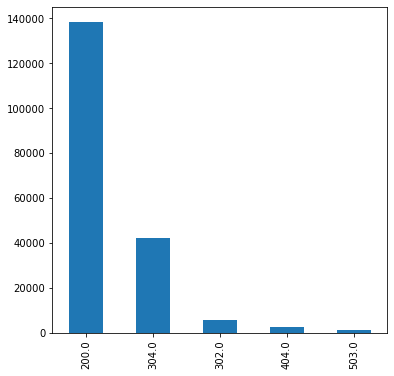

In [18]:
# plot a bar chart of the top 5 HTTP status codes in logs.
ax = df['sc-status'].value_counts().nlargest(5).plot(kind='bar',figsize=[6,6])

### Allowed vs. Blocked

<AxesSubplot:>

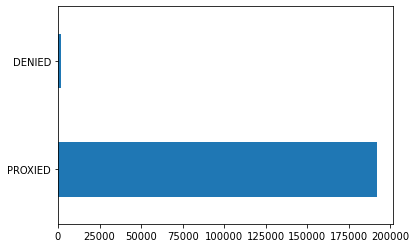

In [23]:
df['sc-filter-result'].value_counts().plot.barh(stacked=True)

## User Agents

In [15]:
# generate a unique count of the values in the "User Agent" column
df['cs(User-Agent)'].value_counts()

Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322)                                64487
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; .NET CLR 1.1.4322)                                     15321
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1)                                                    9825
Mozilla/4.0 (compatible; MSIE 6.0; MSIE 5.5; Windows NT 5.1) Opera 7.01  [en]                              9099
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.7.7) Gecko/20050414 Firefox/1.0.3                     7382
                                                                                                          ...  
ST3PS                                                                                                         1
PGP                                                                                                           1
Internet Download                                                                                       

#### The above query shows a quick overview of the user-agent column,  but let's print the most and least frequent values, which will be more helpful.  

In [16]:
# most frequent value
df['cs(User-Agent)'].value_counts().idxmax()

'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322)'

In [24]:
# summary - user agents where count is less than 5 
temp = df['cs(User-Agent)'].value_counts() < 5
temp.tail(10).index

Index(['ZoneAlarm/5.1.011.000 ZSP/2.1', 'iPassConnect', 'msmsgs/5.0.0.381',
       'Mozilla/4.0 (compatible; MSIE 6.0)', 'Mozilla/4.01 [en] (Win95; I)',
       'ST3PS', 'PGP', 'Internet Download', 'Pure Networks',
       'Turbine-Launcher/1.0 (AC1 launcher=1.0.1.23 gls=1.0.1.21 patch=1.0.1.21)Accept-Encoding: gzip, deflate'],
      dtype='object')

In [90]:
# print UA with values less than 5 - details
temp = df['cs(User-Agent)'].value_counts()[df['cs(User-Agent)'].value_counts() < 5 ]
temp

Microsoft Data Access Internet Publishing Provider Protocol Discovery                                     4
TrillianPRO/2.0 (Windows; I; 32-bit)                                                                      4
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.2; SV1; .NET CLR 1.1.4322)                                4
st                                                                                                        4
Shareaza 2.1.0.0                                                                                          4
Mozilla/4.0 (Windows XP 5.1) Java/1.5.0_02                                                                4
Mozilla/4.0 (compatible; Win32; WinHttp.WinHttpRequest.5)                                                 4
InetClntApp/3.0                                                                                           4
ROGUE/1.0.1                                                                                               4
Mozilla/4.0 (Windows XP 5.1)

In [27]:
# Look for powershell, python, curl, office, shell, scan Metasploit  in the User Agents
df [df['cs(User-Agent)'].str.contains('pow|office|python|curl|shell|metasploit|bot|scan', case= False) == True]['cs(User-Agent)'].unique()

array(['Entourage/11.0 (Mac_PowerPC; DigExt; TmstmpExt)',
       'Mozilla/4.0 (compatible; MSIE 5.14; Mac_PowerPC)'], dtype=object)

In [27]:
# Let's look at destination hosts count by ascending order. 
df['cs-host'].value_counts(ascending=True)

download.sourceforge.net       1
civilwarclipart.com            1
nypost.com                     1
ads.nypost.com                 1
i.office.microsoft.com         1
                            ... 
i.a.cnn.net                 3197
mt.google.com               3288
www.racingone.com           4219
admin.interop.com           4797
us.i1.yimg.com              7408
Name: cs-host, Length: 3577, dtype: int64

In [31]:
# Let's look at destination host proxy categories by ascending order. 
df['sc-filter-category'].value_counts(ascending=True)

Violence/Hate/Racism               6
Alcohol/Tobacco                   11
Pay%20to%20Surf                   20
unavailable                       20
Military                          30
Humor/Jokes                       48
Spyware/Malware%20Sources         50
Religion                          53
Restaurants/Dining/Food           84
Hacking/Proxy%20Avoidance        170
Intimate%20Apparel/Swimsuit      173
Health                           192
Sex%20Education                  201
Streaming%20Media/MP3            237
Web%20Hosting                    420
Political/Activist%20Groups      483
Vehicles                         527
Gambling                         630
Financial%20Services             654
Chat/Instant%20Messaging         710
Real%20Estate                    733
Government/Legal                 796
Adult/Mature%20Content           800
Software%20Downloads             828
Society/Lifestyle               1038
Brokerage/Trading               1425
Web%20Communications            1604
E

#### We see some interesting categories above like "Spyware/Malware%20Sources". Let's see which domains are associated with this category. 

In [38]:
df[df['sc-filter-category'] == "Spyware/Malware%20Sources"]['cs-host'].unique()

array(['webpdp.gator.com', 'www.shopathomeselect.com',
       'promos.hotbar.com', 'pub.weatherbug.com', 'wwc.weatherbug.com',
       'www.internet-optimizer.com', 'isapi60.wxbug.com',
       'www.funwebproducts.com', 'friendfinder.com',
       'help.internet-optimizer.com'], dtype=object)

#### A couple of the above results for "Spyware/Malware%20Sources" category domains appear suspicious such as "www[.]internet-optimizer[.]com". Let's do another search where we pull all domains that contain the words "mal", "Mal", "bot", "spy" in their category.

In [54]:
df [ df['sc-filter-category'].str.contains('mal|Mal|bot|spy',case=False) == True]['cs-host'].value_counts()

isapi60.wxbug.com              19
webpdp.gator.com                8
www.shopathomeselect.com        7
friendfinder.com                4
www.funwebproducts.com          3
promos.hotbar.com               2
wwc.weatherbug.com              2
www.internet-optimizer.com      2
help.internet-optimizer.com     2
pub.weatherbug.com              1
Name: cs-host, dtype: int64

### Let's use whois and see when above hosts were created

In [105]:
temp = df [ df ['sc-filter-category'].str.contains('mal|Mal|bot|spy',case=False) == True]['cs-host'].unique()

for i in temp:
    c_date =  str ( whois.whois(i).creation_date )
    print(i + "\t" + c_date)

webpdp.gator.com	1997-03-19 05:00:00
www.shopathomeselect.com	[datetime.datetime(2001, 5, 23, 17, 19, 15), datetime.datetime(2001, 5, 23, 0, 0)]
promos.hotbar.com	[datetime.datetime(1998, 9, 1, 4, 0), datetime.datetime(2011, 8, 21, 6, 40, 37)]
pub.weatherbug.com	1999-09-20 16:32:56
wwc.weatherbug.com	1999-09-20 16:32:56
www.internet-optimizer.com	[datetime.datetime(2002, 12, 19, 18, 16, 12), datetime.datetime(2002, 12, 19, 13, 16, 12)]
isapi60.wxbug.com	2000-04-05 19:58:40
www.funwebproducts.com	2003-06-18 18:42:09
friendfinder.com	[datetime.datetime(1998, 3, 5, 5, 0), datetime.datetime(1998, 3, 5, 0, 0)]
help.internet-optimizer.com	[datetime.datetime(2002, 12, 19, 18, 16, 12), datetime.datetime(2002, 12, 19, 13, 16, 12)]


#### Looks like these domains are created a while back. So, let's move on for now to looking at the "unavailable" category; these could be more interesting.  

In [41]:
df[df['sc-filter-category'] == "unavailable"]['cs-host'].unique()

array(['-', 'www.hawkeyedraintile.com'], dtype=object)

#### So looking at the "unavailable" category events above, we only get one hit, which is suspicious. So let's learn more details related to this domain. 

In [44]:
# lets look at 'c-ip' for the 'unavailable' category
df[df['sc-filter-category'] == "unavailable"]['c-ip'].unique()

array(['45.25.2.252', '45.14.5.248', '45.14.5.240', '45.14.4.114',
       '45.14.5.160', '45.14.5.103', '45.0.18.252', '45.25.4.252'],
      dtype=object)

In [28]:
## If you have access to an intel feed's API, you could take above IPs and enrich through it.

In [48]:
df[df['sc-filter-category'] == "unavailable"]['cs(User-Agent)'].value_counts(ascending=True)

Shareaza 2.1.0.0                                                                           1
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322)                 2
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.7.7) Gecko/20050414 Firefox/1.0.3     2
-                                                                                         15
Name: cs(User-Agent), dtype: int64

#### In the result above, we get one unusual user-agent: "Shareaza 2.1.0.0". And when you research this, it appears to be related to "A universal P2P file sharing client for Windows" 

#### Let's capture where which IP is observed using "Shareaza" UA and likely has that P2P client installed

In [45]:
df [(df['cs(User-Agent)'] == 'Shareaza 2.1.0.0')][['date', 'sc-filter-result', 'cs-method', 'c-ip','cs-host','cs-bytes' ,'sc-filter-category']]

date sc-filter-result cs-method         c-ip  \
128049  2005-05-06          PROXIED  GNUTELLA  45.25.4.252   
148448  2005-05-06           DENIED       GET  45.25.4.252   
148842  2005-05-06          PROXIED       GET  45.25.4.252   
148846  2005-05-06          PROXIED       GET  45.25.4.252   

                    cs-host  cs-bytes sc-filter-category  
128049                    -     346.0        unavailable  
148448  tobiasserver.ath.cx     266.0   Business/Economy  
148842   empire-hosting.net     240.0        Pornography  
148846       lowesthost.com     218.0               none

#### Let's move from the proxy category and start looking at IP addresses. 
#### First, I want to use a regex to pull all public IP addresses from the 'cs-host' and their "sc-status"

In [64]:
# Public IP addresses only & their HTTP Response status code
df [ df['cs-host'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-1])|(25[6-9]|2[6-9][0-9]|[3-9][0-9][0-9]|99[1-9]))[0-9]{1,3}\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)') == True ][['cs-host','sc-status']]

C:\Users\IEUser\AppData\Local\Temp/ipykernel_6520/1211039442.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df [ df['cs-host'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-1])|(25[6-9]|2[6-9][0-9]|[3-9][0-9][0-9]|99[1-9]))[0-9]{1,3}\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)') == True ][['cs-host','sc-status']]


cs-host  sc-status
815     216.169.154.137      200.0
866     216.169.154.137      200.0
954     216.169.154.137      304.0
999     216.169.154.137      200.0
1000    216.169.154.137      200.0
1001    216.169.154.137      200.0
1118    216.169.154.137      200.0
1126    216.169.154.137      200.0
1261    216.169.154.137      200.0
1467     149.174.36.116      200.0
1468     149.174.36.116      200.0
1470     149.174.36.116      200.0
1472     149.174.36.116      200.0
1474     149.174.36.116      200.0
1475     149.174.36.116      200.0
1476     149.174.36.116      200.0
1477     149.174.36.116      200.0
1478     149.174.36.116      200.0
1479     149.174.36.116      200.0
1481     149.174.36.116      200.0
1482     149.174.36.116      200.0
1483     149.174.36.116      200.0
1484     149.174.36.116      200.0
1485     149.174.36.116      200.0
1487     149.174.36.116      200.0
1488     149.174.36.116      200.0
1492     149.174.36.116      200.0
1493     149.174.36.116      200.0
1494     149.174.36.116      200.0
1495     149.174.36.116      200.0
1496     149.174.36.116      200.0
1497     149.174.36.116      200.0
1498     149.174.36.116      200.0
1499     149.174.36.116      200.0
1500     149.174.36.116      200.0
1502     149.174.36.116      200.0
1503     149.174.36.116      200.0
1505     149.174.36.116      200.0
1506     149.174.36.116      200.0
1508     149.174.36.116      200.0
1510     149.174.36.116      200.0
1513     149.174.36.116      200.0
1523     149.174.36.116      200.0
1530     149.174.36.116      200.0
1531     149.174.36.116      200.0
1533     149.174.36.116      200.0
1534     149.174.36.116      200.0
1535     149.174.36.116      200.0
1536     149.174.36.116      200.0
1537     149.174.36.116      200.0
1538     149.174.36.116      200.0
1539     149.174.36.116      200.0
1540     149.174.36.116      200.0
1541     149.174.36.116      200.0
1542     149.174.36.116      200.0
1543     149.174.36.116      200.0
1544     149.174.36.116      200.0
1545     149.174.36.116      200.0
1546     149.174.36.116      200.0
1547     149.174.36.116      200.0
1548     149.174.36.116      200.0
1549     149.174.36.116      200.0
1550     149.174.36.116      200.0
1551     149.174.36.116      200.0
1552     149.174.36.116      200.0
1553     149.174.36.116      200.0
1554     149.174.36.116      200.0
1555     149.174.36.116      200.0
1556     149.174.36.116      200.0
1557     149.174.36.116      200.0
1558     149.174.36.116      200.0
1559     149.174.36.116      200.0
1560     149.174.36.116      200.0
1561     149.174.36.116      200.0
1562     149.174.36.116      200.0
1563     149.174.36.116      200.0
1564     149.174.36.116      200.0
1565     149.174.36.116      200.0
1566     149.174.36.116      200.0
1567     149.174.36.116      200.0
1568     149.174.36.116      200.0
1569     149.174.36.116      200.0
1570     149.174.36.116      200.0
1571     149.174.36.116      200.0
1572     149.174.36.116      200.0
1573     149.174.36.116      200.0
1574     149.174.36.116      200.0
1575     149.174.36.116      200.0
1576     149.174.36.116      200.0
1577     149.174.36.116      200.0
1578     149.174.36.116      200.0
1579     149.174.36.116      200.0
1580     149.174.36.116      200.0
1581     149.174.36.116      200.0
1582     149.174.36.116      200.0
1583     149.174.36.116      200.0
1584     149.174.36.116      200.0
1585     149.174.36.116      200.0
1603     149.174.36.116      200.0
1611     149.174.36.116      200.0
1612     149.174.36.116      200.0
1613     149.174.36.116      200.0
4273    216.169.154.137      200.0
8918         45.28.0.30      503.0
11039     68.142.139.60      200.0
11040     68.142.139.60      404.0
11041     68.142.139.60      404.0
11048     68.142.139.60      200.0
11058     68.142.139.60      200.0
11274     68.142.139.60      200.0
12885     192.33.62.106      503.0
12887     192.33.62.106      503.0
12904     192.33.62.106      503.0
13134     192.33.62.106   

In [65]:
# Public IP addresses only
df [ df['cs-host'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-1])|(25[6-9]|2[6-9][0-9]|[3-9][0-9][0-9]|99[1-9]))[0-9]{1,3}\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)') == True ]['cs-host'].unique()

C:\Users\IEUser\AppData\Local\Temp/ipykernel_6520/2357496570.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df [ df['cs-host'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-1])|(25[6-9]|2[6-9][0-9]|[3-9][0-9][0-9]|99[1-9]))[0-9]{1,3}\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)') == True ]['cs-host'].unique()


array(['216.169.154.137', '149.174.36.116', '45.28.0.30', '68.142.139.60',
       '192.33.62.106', '67.19.211.138', '67.19.211.114', '70.84.241.186',
       '161.58.81.177', '70.84.241.234', '70.84.241.250',
       '68.165.147.253', '159.161.137.42', '129.37.0.113',
       '198.104.142.51', '136.151.233.11', '204.146.166.107',
       '208.219.220.204', '32.97.118.242', '212.72.11.166',
       '207.61.242.85', '203.199.70.171', '203.199.70.249',
       '192.16.170.44', '203.199.70.237', '157.54.4.22', '66.45.111.1',
       '66.151.136.18', '66.102.7.104', '64.158.218.149',
       '209.197.108.169', '66.39.90.240', '207.44.238.18',
       '207.234.144.94', '195.41.47.82', '65.219.61.150', '64.69.70.158',
       '24.234.200.1', '66.162.189.124', '66.70.65.210', '69.56.176.76',
       '132.233.247.5', '64.4.43.250', '69.31.37.42', '70.84.241.226',
       '80.85.71.33', '62.26.121.2', '64.255.164.70', '143.166.99.131',
       '65.54.244.250', '207.114.199.161', '66.151.158.177',
       '65.

#### Lets now look at traffic where HTTP Method is "POST" or "PUT" sugguesting a possible exfil

In [68]:
# HTTP "POST" or "PUT". The output table will include ip, host, bytes and category
df [(df['cs-method'] == 'POST') | (df['cs-method'] == 'PUT')][['c-ip','cs-host','cs-bytes' ,'sc-filter-category']]

c-ip                              cs-host   cs-bytes  \
95           10.0.1.2                  register.ositis.com      700.0   
96           10.0.1.2                  register.ositis.com      749.0   
1162       10.2.13.59                          10.2.13.200      699.0   
1365       10.2.13.59                reporter.bluecoat.com      810.0   
1995         10.0.1.2                  register.ositis.com      698.0   
1996         10.0.1.2                  register.ositis.com      762.0   
2060         10.0.1.2                  register.ositis.com      702.0   
2061         10.0.1.2                  register.ositis.com      763.0   
2073         10.0.1.4           stats.update.microsoft.com     2721.0   
2130         10.0.1.2                  register.ositis.com      698.0   
2131         10.0.1.2                  register.ositis.com      741.0   
2177         10.0.1.4           stats.update.microsoft.com     2721.0   
2186         10.0.1.2                  register.ositis.com      710.0   
2187         10.0.1.2                  register.ositis.com      765.0   
2247         10.0.1.2                  register.ositis.com      692.0   
2248         10.0.1.2                  register.ositis.com      760.0   
2281         10.0.1.4           stats.update.microsoft.com     2721.0   
2317         10.0.1.2                  register.ositis.com      705.0   
2318         10.0.1.2                  register.ositis.com      780.0   
2394         10.0.1.2                  register.ositis.com      695.0   
2395         10.0.1.2                  register.ositis.com      779.0   
2422         10.0.1.4           stats.update.microsoft.com     2721.0   
2536       10.2.13.59                reporter.bluecoat.com      709.0   
2558       10.2.13.59                reporter.bluecoat.com      787.0   
2728      10.2.13.200                watchdog.bluecoat.com      703.0   
2741      10.2.13.200                watchdog.bluecoat.com      783.0   
2745      10.2.13.200                watchdog.bluecoat.com      787.0   
2753      10.2.13.200                watchdog.bluecoat.com      769.0   
3381      10.2.13.200                watchdog.bluecoat.com      703.0   
3393      10.2.13.200                watchdog.bluecoat.com      787.0   
3396      10.2.13.200                watchdog.bluecoat.com      773.0   
3408      10.2.13.200                watchdog.bluecoat.com      769.0   
3420      10.2.13.200                watchdog.bluecoat.com      787.0   
3429      10.2.13.200                watchdog.bluecoat.com      945.0   
3488       10.2.13.59                reporter.bluecoat.com      778.0   
3571       10.2.13.59                reporter.bluecoat.com      778.0   
3746       10.2.13.59                          10.2.13.200      714.0   
3823      10.2.13.200                watchdog.bluecoat.com      703.0   
3849      10.2.13.200                watchdog.bluecoat.com      703.0   
3866      10.2.13.200                watchdog.bluecoat.com      787.0   
4129         10.0.1.2                  register.ositis.com      695.0   
4130         10.0.1.2                  register.ositis.com      740.0   
4148       10.2.13.59  v5stats.windowsupdate.microsoft.com     2474.0   
4163       10.2.13.59  v5stats.windowsupdate.microsoft.com     2474.0   
4174      10.2.13.200                watchdog.bluecoat.com      703.0   
4222       10.2.13.59                          10.2.13.200      764.0   
4255      10.2.13.200                watchdog.bluecoat.com      676.0   
4338      10.2.13.200                watchdog.bluecoat.com      760.0   
4346      10.2.13.200                watchdog.bluecoat.com      742.0   
4363      10.2.13.200                watchdog.bluecoat.com      676.0   
4382      10.2.13.200                watchdog.bluecoat.com      676.0   
4400      10.2.13.200                watchdog.bluecoat.com      676.0   
4419      10.2.13.200                watchdog.bluecoat.com      676.0   
4438      10.2.13.200                watchdog.bluecoat.com      676.0   
44

<AxesSubplot:ylabel='cs-method'>

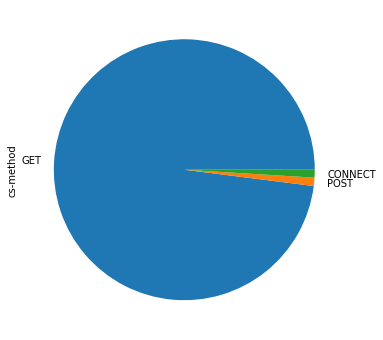

In [16]:
# plot a pie chart of the top 3 HTTPS Methods observed in logs
df['cs-method'].value_counts().nlargest(3).plot(kind='pie',figsize=[6,6])

#### Let's drill down further in exfil question and show hosts where max data appears to have been uploaded

In [78]:
temp = df.groupby('cs-host').sum().sort_values('cs-bytes',ascending=False) 
temp [ temp > 1000000 ]['cs-bytes'].sort_values(ascending=False)
# df.dropna()
## you can remove the NaN (not a number) but it will take long time

cs-host
netmail.verizon.net                                     5502012.0
us.i1.yimg.com                                          2952907.0
rad.msn.com                                             2608012.0
www.racingone.com                                       2316307.0
forums.offtopic.com                                     1972109.0
mt.google.com                                           1816953.0
games.espn.go.com                                       1614433.0
watchdog.bluecoat.com                                   1354826.0
kh.google.com                                           1314420.0
i.a.cnn.net                                             1242429.0
images.rei.com                                          1235400.0
a1072.g.akamai.net                                      1199860.0
www.aa.com                                              1078188.0
us.f212.mail.yahoo.com                                  1056451.0
wcp.getthere.net                                        1030689.0
ww

### Let's review the HTTP Response "Content-Type" Field

In [79]:
# List of content 
df['rs(Content-Type)'].unique()

array(['text/html', 'application/octet-stream', '-', 'image/gif',
       'image/jpeg', 'text/html;%20charset=iso-8859-1', 'text/css',
       'image/png', 'text/plain;%20charset=iso-8859-1',
       'application/x-javascript', 'image/x-icon',
       'text/html;%20charset=ISO-8859-1', None,
       'text/html;%20charset=UTF-8', 'text/javascript;%20charset=UTF-8',
       'application/pkix-crl', 'text/rdf', 'text/xml;%20charset=utf-8',
       'application/zip', 'text/plain', 'application/pdf',
       'text/javascript', 'application/x-shockwave-flash',
       'text/plain;%20charset=ISO-8859-1', 'text/html;charset=ISO-8859-1',
       'text/html;%20charset=utf-8',
       'application/x-javascript;%20charset=iso-8859-1',
       'text/css;%20charset=iso-8859-1', 'application/x-pointplus',
       'text/xml', 'video/quicktime', 'image/pjpeg',
       'text/plain;%20charset=UTF-8', 'text/html;%20Charset=utf-8',
       'text/xml;%20charset=iso-8859-1', 'GCZ',
       'application/vnd.ms-pki.seccat', 't

In [82]:
# The HTTP POST method uses 'application/x-www-urlform-encoded' to upload data. Let's see which host do we see this with.
df [ ( df['rs(Content-Type)'] == 'application/x-www-urlform-encoded' ) == True ]['cs-host'].unique()

array(['www.clocklink.com'], dtype=object)

In [83]:
# When executables are downloaded, this content type is 'application/octate-stream'. Let's see which host do we see this with. 
df [ (df['rs(Content-Type)'] == 'application/octate-stream') == True ]

Empty DataFrame
Columns: [date, time, time-taken, c-ip, sc-status, s-action, sc-bytes, cs-bytes, cs-method, cs-uri-scheme, cs-host, cs-uri-path, cs-uri-query, cs-username, s-hierarchy, s-supplier-name, rs(Content-Type), cs(User-Agent), sc-filter-result, sc-filter-category, x-virus-id, s-ip, s-sitename, x-virus-details, x-icap-error-code, x-icap-error-details]
Index: []

In [85]:
# Are there any images file types with unusual Content-Types? 
df[ (df['cs-uri-path'].str.contains('png|PNG') ) & ( df['rs(Content-Type)'] == 'application/octate-stream') ]['rs(Content-Type)']

Series([], Name: rs(Content-Type), dtype: object)

# Interactive Report

In [9]:
profile = ProfileReport(df, title="Web Proxy Logs Hunt", explorative=True)

In [10]:
#profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
#Thanks! Another happy hunting session!